<a href="https://colab.research.google.com/github/ishitabakshi/DS1002/blob/main/Bakshi_06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [35]:
import pandas as pd

---

In [36]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [40]:
series = pd.Series(list)

3. Take the above series and add an index that starts at 2 and steps by 3

In [41]:
new_index = range(2, len(series) * 3, 3) # this makes the index start at 2, stop after the length of the list coveretd to a series times 3, and take steps of 3
series.index = new_index # this sets the new index as the indect of the series
print(series.index)

RangeIndex(start=2, stop=15, step=3)


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [42]:
people_dict = { # dictionary including 4 people and their information
    'Name': ['Ishita', 'Sofia', 'Grace', 'Abby'],
    'Age': [30, 24, 53, 45],
    'Career': ['Doctor', 'Teacher', 'Engineer', 'Accountant']
}

df = pd.DataFrame.from_dict(people_dict) # takes the information from people_dict and coverts it into a data frame
print(df)

     Name  Age      Career
0  Ishita   30      Doctor
1   Sofia   24     Teacher
2   Grace   53    Engineer
3    Abby   45  Accountant


In [43]:
df.index.name = 'participant_id'
print(df)

                  Name  Age      Career
participant_id                         
0               Ishita   30      Doctor
1                Sofia   24     Teacher
2                Grace   53    Engineer
3                 Abby   45  Accountant


6. Use a pandas function to determine the data types of the columns of `df`.

In [24]:
df.dtypes

Name      object
Age        int64
Career    object
dtype: object

7. Using bracket notation, reference column `name`

In [25]:
df['Name']

participant_id
0    Ishita
1     Sofia
2     Grace
3      Abby
Name: Name, dtype: object

8. Using dot notation, reference column `name`

In [26]:
df.Name

participant_id
0    Ishita
1     Sofia
2     Grace
3      Abby
Name: Name, dtype: object

8. Reference column `name` and have it returned in a dataframe.

In [27]:
namedf = pd.DataFrame(df.Name)
print(namedf)

                  Name
participant_id        
0               Ishita
1                Sofia
2                Grace
3                 Abby


9. Show the 3rd element in column `career`.

In [28]:
element = df.loc[2,'Career']
print(element)

Engineer


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [29]:
import seaborn as sns
iris = sns.load_dataset('iris')

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [30]:
iris[['sepal_length','sepal_width']].corr() # .corr is used to find the correlation between variables

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [31]:
species = 'setosa' # assigns the string setosa to the variable species
species = iris.loc[iris['species'] == species] # filters the data frame to only include rows where the species in setosa
#print(iris.dtypes) # this was printed to confirm the index of the sepal_length and sepal_width columns were 0 and 1

setosa_corr = species.corr(numeric_only=True).iloc[0, 1] # calculates the correlation coefficient between 'sepal_length' and 'sepal_width' for the 'setosa' species and renames the value setosa_corr
print(setosa_corr)

species = 'versicolor' # assigns the string versicolor to the variable species
species = iris.loc[iris['species'] == species]

versicolor_corr = species.corr(numeric_only=True).iloc[0, 1]
print(versicolor_corr)

species = 'virginica' # assigns the string virginica to the variable species
species = iris.loc[iris['species'] == species]

virginica_corr = species.corr(numeric_only=True).iloc[0, 1]
print(virginica_corr)

print('The setosa species has the highest correlation between sepal_length and sepal_width based on the calculated correlation coefficients.')


0.7425466856651594
0.5259107172828247
0.45722781639411325
The setosa species has the highest correlation between sepal_length and sepal_width based on the calculated correlation coefficients.


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [32]:
# filter data for setosa species
species = 'setosa'
setosa_species = iris.loc[iris['species'] == species]

# find correlation matrix for the columns
setosa_corr = setosa_species.corr(numeric_only=True)
print(setosa_corr)

# find the smallest correlation value for setosa species and use this to idenfity the two variables
smallest_correlation = setosa_corr.min().min()
print("The smallest correlation for the setosa species is", str(smallest_correlation) + ", which is between petal length and sepal width.")



# filter data for virginica species
species = 'virginica'
virginica_species = iris.loc[iris['species'] == species]

# find correlation matrix for the columns
virginica_corr = virginica_species.corr(numeric_only=True)
print(virginica_corr)

# find the smallest correlation value for virginica species and use this to idenfity the two variables
smallest_correlation = virginica_corr.min().min()
print("The smallest correlation for the virginica species is", str(smallest_correlation) + ", which is between petal width and sepal length.")

# filter data for versicolor species
species = 'versicolor'
versicolor_species = iris.loc[iris['species'] == species]

# find correlation matrix for the columns
versicolor_corr = versicolor_species.corr(numeric_only=True)
print(versicolor_corr)

# find the smallest correlation value for versicolor species and use this to idenfity the two variables
smallest_correlation = versicolor_corr.min().min()
print("The smallest correlation for the versicolor species is", str(smallest_correlation) + ", which is between sepal width and sepal length.")

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.742547      0.267176     0.278098
sepal_width       0.742547     1.000000      0.177700     0.232752
petal_length      0.267176     0.177700      1.000000     0.331630
petal_width       0.278098     0.232752      0.331630     1.000000
The smallest correlation for the setosa species is 0.1776999667822706, which is between petal length and sepal width.
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.457228      0.864225     0.281108
sepal_width       0.457228     1.000000      0.401045     0.537728
petal_length      0.864225     0.401045      1.000000     0.322108
petal_width       0.281108     0.537728      0.322108     1.000000
The smallest correlation for the virginica species is 0.2811077091573193, which is between petal width and sepal length.
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.0000

14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


This is possible because even though each of the species has positive trend lines in terms of their correlation, the setosa species is overall much lower than the other two, making the overall correlation appear negative. Misrepresentation like this can happen when correlations are made between  groups that have different ratios and characteristics. We can see  in the graph below that the general lengths and widths of the setosa species is much lower.



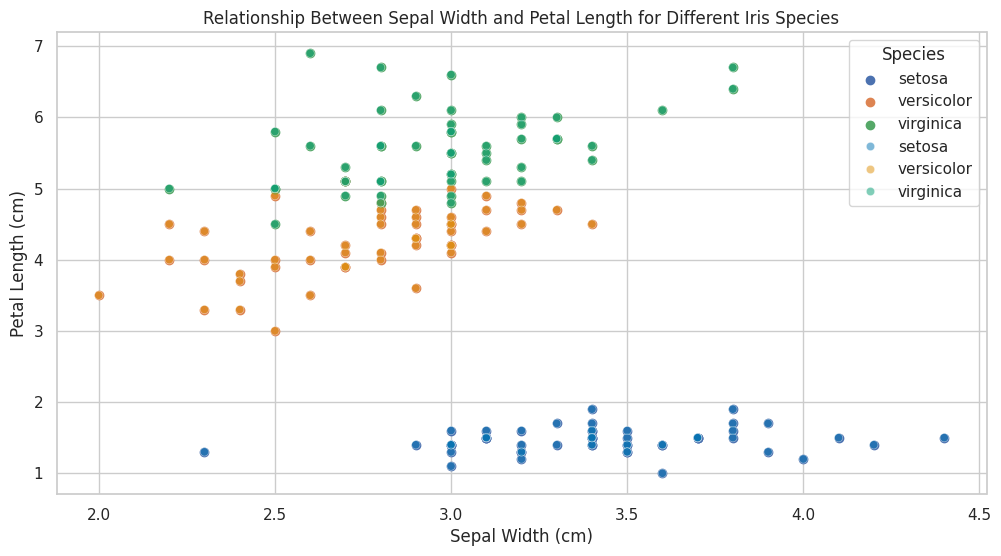

In [34]:
import matplotlib.pyplot as plt
from sklearn import datasets


iris = datasets.load_iris() # this loads the iris data set
irisdf = pd.DataFrame(data=iris.data, columns=iris.feature_names) # creates a data frame using the iris data
irisdf['species'] = iris.target # these 2 creates a new column with species and correlated it to the data
irisdf['species'] = irisdf['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.set(style="whitegrid") # ets the style of the plot as a white background with grid lines
plt.figure(figsize=(12, 6))

for species in irisdf['species'].unique(): # creates a scatter plot of sepal width versus petal length
    plt.scatter(x='sepal width (cm)', y='petal length (cm)', data=irisdf[irisdf['species'] == species], label=species)

sns.scatterplot(x='sepal width (cm)', y='petal length (cm)', hue='species', data=irisdf, palette='colorblind', alpha=0.5) # creates a plot for all species combined

# adding formatting and lables to the graph
plt.title('Relationship Between Sepal Width and Petal Length for Different Iris Species')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()